In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load and Combine Data
with open("/content/drive/MyDrive/Colab Notebooks/posts.json") as file1, open("/content/drive/MyDrive/Colab Notebooks/posts_new.json") as file2:
    posts_data = json.load(file1) + json.load(file2)

# Create DataFrame
df = pd.DataFrame(posts_data)
df['posted'] = pd.to_datetime(df['posted'], errors='coerce')
df.dropna(subset=['posted'], inplace=True)  # Drop rows where 'posted' is NaT (invalid dates)

# Preview data
df.head()

,images,num_comments,num_empathy,num_likes,num_praises,num_reposts,post_url,posted,poster_linkedin_url,reshared,text,time,urn,num_appreciations,num_interests,video,resharer_comment,article_subtitle,article_title,document
0,[{'url': 'https://media.licdn.com/dms/image/v2...,2,1.0,58,4.0,0,https://www.linkedin.com/feed/update/urn:li:ac...,2024-10-29 21:37:10,https://www.linkedin.com/in/gokhan-egri,False,"Come hear me talk about AI, AGI, LLM, GTM and ...",1 week ago,7257143454021947392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],0,NaN,10,NaN,1,https://www.linkedin.com/feed/update/urn:li:ac...,2024-10-27 16:29:42,https://www.linkedin.com/in/andrei-juc,False,Build tools to build tools,1 week ago,7256341301556604929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[{'url': 'https://media.licdn.com/dms/image/v2...,8,7.0,176,14.0,6,https://www.linkedin.com/feed/update/urn:li:ac...,2024-10-14 15:03:57,https://www.linkedin.com/company/globalturksai,True,We hosted an insightful webinar that featured ...,3 weeks ago,7251608679530000385,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,[],5,4.0,84,6.0,6,https://www.linkedin.com/feed/update/urn:li:ac...,2024-10-10 18:22:42,https://www.linkedin.com/in/gokhan-egri,False,My wide ranging conversation on enterprise AI ...,3 weeks ago,7250209145209896963,NaN,1.0,"{'duration': 312000, 'stream_url': 'https://dm...",NaN,NaN,NaN,NaN
4,[{'url': 'https://media.licdn.com/dms/image/v2...,9,9.0,237,6.0,16,https://www.linkedin.com/feed/update/urn:li:ac...,2024-09-19 15:55:36,https://www.linkedin.com/company/globalturksai,True,​We invite you to join an exclusive live panel...,1 month ago,7242561979855368194,2.0,NaN,NaN,"Come hear me talk about AI, automation, startu...",NaN,NaN,NaN


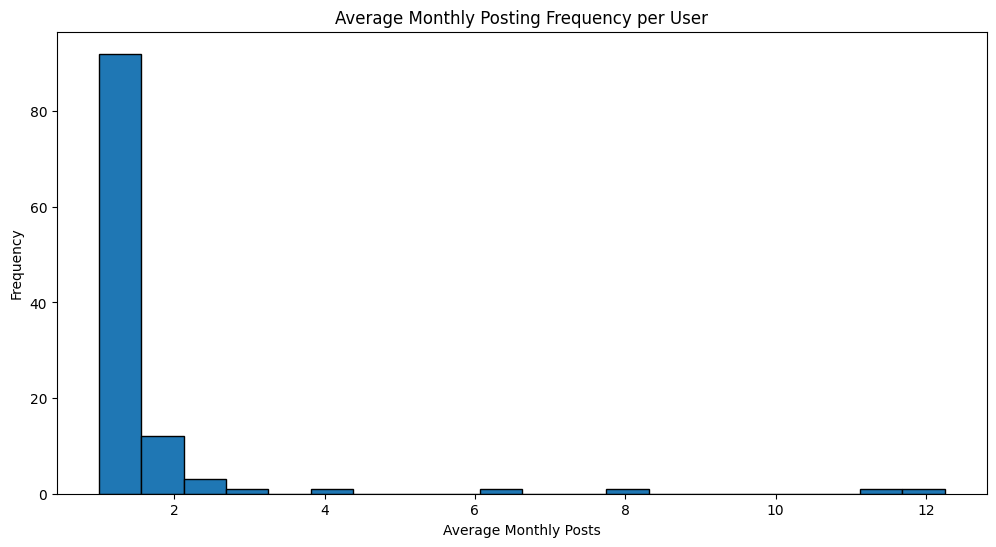

In [4]:
# Extract year and month for grouping
df['year_month'] = df['posted'].dt.to_period('M')

# Calculate average monthly posting frequency
monthly_posts = df.groupby(['poster_linkedin_url', 'year_month']).size().reset_index(name='post_count')
avg_monthly_frequency = monthly_posts.groupby('poster_linkedin_url')['post_count'].mean()

# Plot average monthly posting frequency
plt.figure(figsize=(12, 6))
avg_monthly_frequency.plot(kind='hist', bins=20, edgecolor='black')
plt.title("Average Monthly Posting Frequency per User")
plt.xlabel("Average Monthly Posts")
plt.ylabel("Frequency")
plt.show()


Average Post Length: 117.46 words


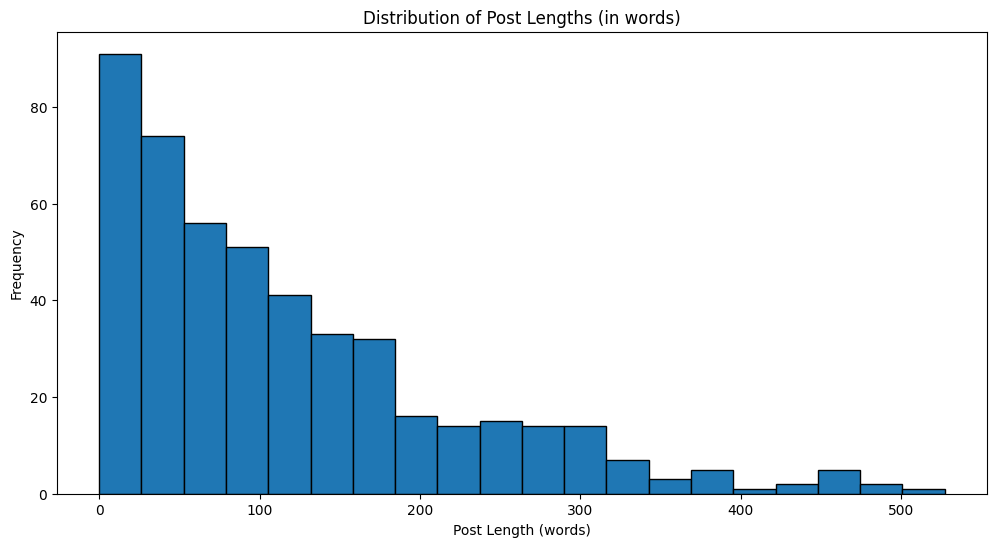

In [5]:
# Calculate post length by word count
df['post_length'] = df['text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Calculate average post length
avg_post_length = df['post_length'].mean()
print(f"Average Post Length: {avg_post_length:.2f} words")

# Plot distribution of post lengths
plt.figure(figsize=(12, 6))
df['post_length'].plot(kind='hist', bins=20, edgecolor='black')
plt.title("Distribution of Post Lengths (in words)")
plt.xlabel("Post Length (words)")
plt.ylabel("Frequency")
plt.show()


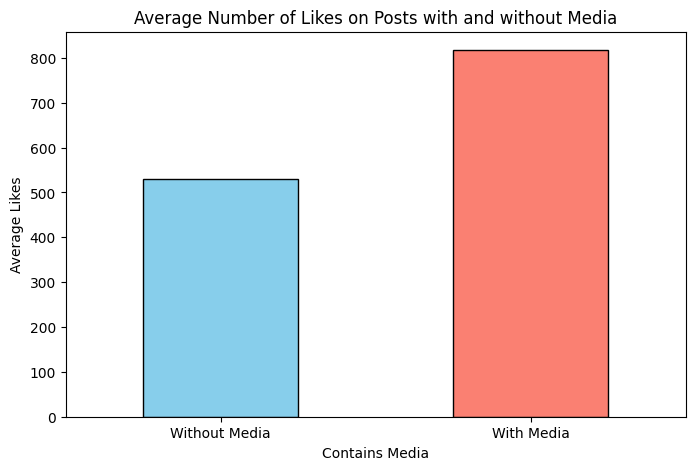

In [6]:
# Determine if post has media (images or videos)
df['has_media'] = df['images'].apply(lambda x: len(x) > 0)

# Calculate average likes on posts with and without media
media_likes = df.groupby('has_media')['num_likes'].mean()

# Plot average likes on each media type
plt.figure(figsize=(8, 5))
media_likes.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Average Number of Likes on Posts with and without Media")
plt.xlabel("Contains Media")
plt.ylabel("Average Likes")
plt.xticks([0, 1], ['Without Media', 'With Media'], rotation=0)
plt.show()


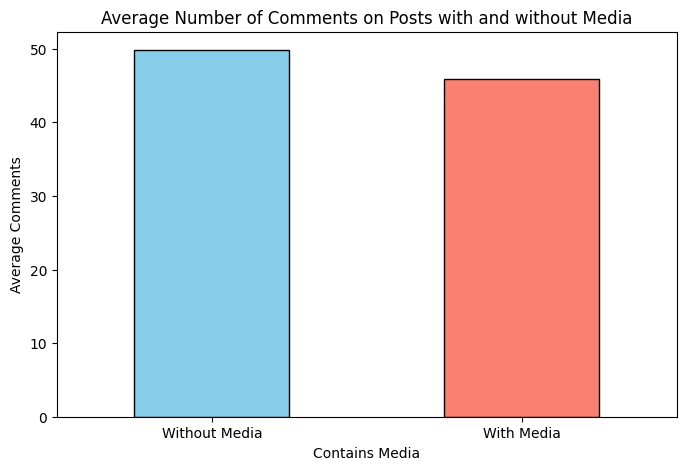

In [7]:
# Calculate average comments on posts with and without media
media_comments = df.groupby('has_media')['num_comments'].mean()

# Plot average comments on each media type
plt.figure(figsize=(8, 5))
media_comments.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Average Number of Comments on Posts with and without Media")
plt.xlabel("Contains Media")
plt.ylabel("Average Comments")
plt.xticks([0, 1], ['Without Media', 'With Media'], rotation=0)
plt.show()


<ipython-input-8-435da3070f59>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_engagement = df.set_index('posted')['total_engagement'].resample('M').mean()


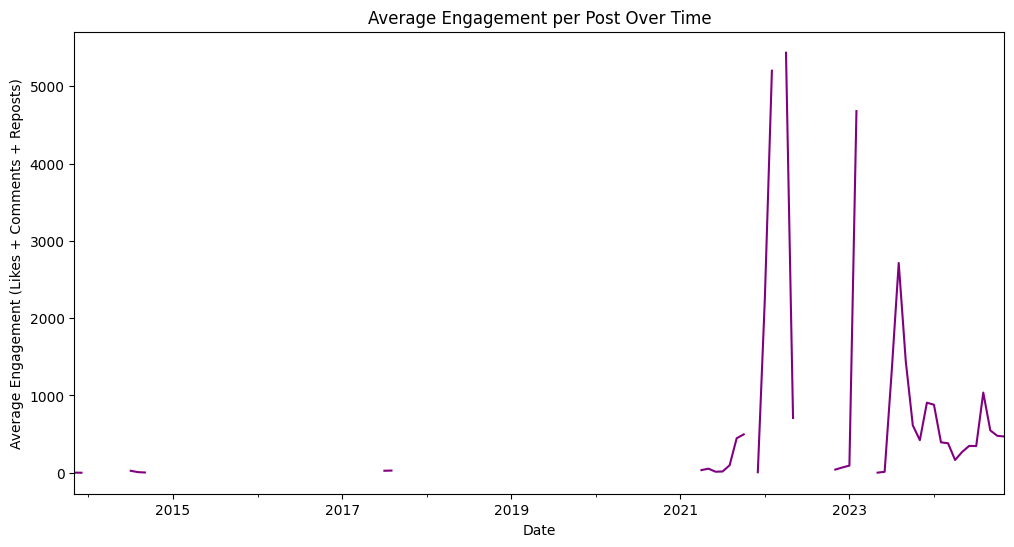

In [8]:
# Calculate total engagement as the sum of likes, comments, and reposts
df['total_engagement'] = df['num_likes'] + df['num_comments'] + df['num_reposts']

# Resample to monthly frequency and calculate average engagement
monthly_engagement = df.set_index('posted')['total_engagement'].resample('M').mean()

# Plot engagement over time
plt.figure(figsize=(12, 6))
monthly_engagement.plot(color='purple')
plt.title("Average Engagement per Post Over Time")
plt.xlabel("Date")
plt.ylabel("Average Engagement (Likes + Comments + Reposts)")
plt.show()
